In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
citycsv = "raw_data/city_data.csv"
ridecsv = "raw_data/ride_data.csv"
city_df = pd.read_csv(citycsv)
clean_city_df = pd.DataFrame({"driver_count": city_df.groupby("city")["driver_count"].sum(),
                              'type': city_df.groupby('city').first()['type']    
                             })
clean_city_df.reset_index(inplace=True)
clean_city_df.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [3]:
ride_df = pd.read_csv(ridecsv)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
city_ride_df = pd.DataFrame({"Fares": ride_df.groupby("city")["fare"].mean(),
                             "Rides": ride_df.groupby("city")["ride_id"].count()   
                             })
city_ride_df.reset_index(inplace=True)
city_ride_df = pd.merge(city_ride_df,clean_city_df,on="city")


color_df = pd.DataFrame({"type":["Urban","Suburban","Rural"],
                         "color": ["lightcoral","lightskyblue", "gold"]    
                         })
color_df = color_df.set_index("color")

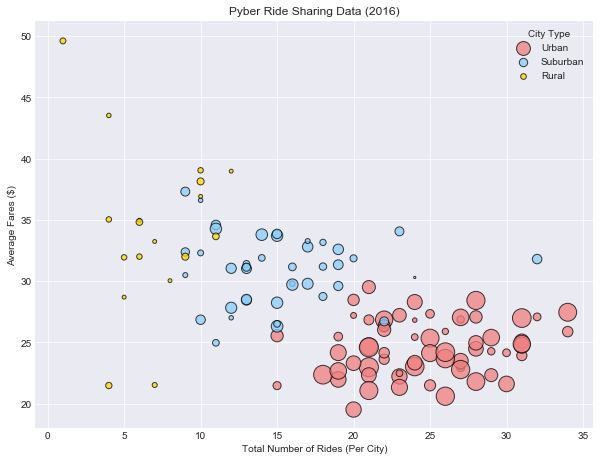

In [5]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
for color in ["lightcoral","lightskyblue", "gold"]:    
    plt.scatter(x=city_ride_df.loc[city_ride_df["type"]==color_df.loc[color,"type"],:]["Rides"], 
                y=city_ride_df.loc[city_ride_df["type"]==color_df.loc[color,"type"],:]["Fares"], 
                s=city_ride_df.loc[city_ride_df["type"]==color_df.loc[color,"type"],:]["driver_count"]*5, 
                color=color, label=color_df.loc[color,"type"],alpha=0.75,edgecolor="black",linewidths=1)
plt.legend(title="City Type")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.show()

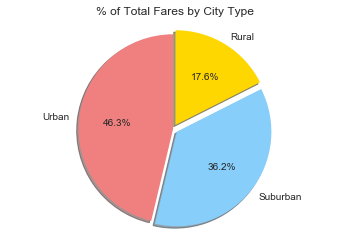

In [6]:
city_type = ["Urban", "Suburban", "Rural"]
fares = city_ride_df.groupby("type").sum()["Fares"]
fares_list = [fares["Urban"],fares["Suburban"],fares["Rural"]]
colors = ["lightcoral","lightskyblue", "gold"]
explode = (0, 0.05, 0.05)
plt.pie(fares_list, explode=explode, labels=city_type, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

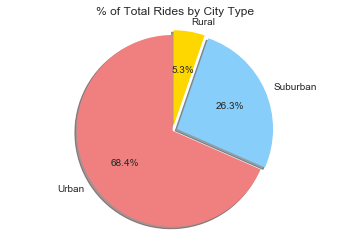

In [7]:
rides = city_ride_df.groupby("type").sum()["Rides"]
rides_list = [rides["Urban"],rides["Suburban"],rides["Rural"]]
plt.pie(rides_list, explode=explode, labels=city_type, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

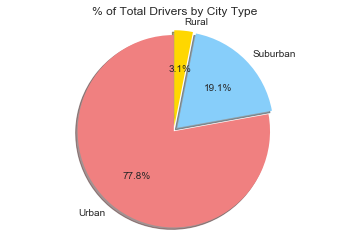

In [8]:
drivers = city_ride_df.groupby("type").sum()["driver_count"]
drivers_list = [drivers["Urban"],drivers["Suburban"],drivers["Rural"]]
plt.pie(drivers_list, explode=explode, labels=city_type, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()